In [1]:
import sklearn as sk
from collections import Counter
from numpy import genfromtxt
import statistics as stats 
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from matplotlib import figure
import matplotlib.patches as mpatches
import sys
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap


In [2]:
wd="/mnt/storage5/anton/Loraine_Liver_Data/AccessoryGenome_60/"
matrixFile="pcaMatrixAssemblies.tsv"
dataDF=pd.read_csv(wd+matrixFile,sep="\t",index_col=0)
matrix=dataDF.to_numpy()

In [5]:
#assign sample labels: L-collected from liver, NL- not specified as liver in metadata. The Loraine (2018) data aset has two labels: S - susceptible R - resistant
labelsDic={}
with open(wd+"../SampleLabels.tsv") as file:
    #ID, phenotype, ST
    for line in file:
        values=line.strip().split("\t")
        labelsDic[values[0]]=[values[1],values[2],values[3], values[4], values[5], values[6], values[7]]
labels=[]
STs=[]
Countries=[]
SampleIDs=[]
for id in dataDF.index:
    labels.append(labelsDic[id][0])
    STs.append(labelsDic[id][1])
    Countries.append(labelsDic[id][2])
    SampleIDs.append(id)
labels=np.asarray(labels)
STs=np.asarray(STs)
SampleIDs=np.asarray(SampleIDs)

nodeDescription={}
with open(wd+"vertexMetaData.tsv") as file:
    for line in file:
        values=line.strip().split("\t")
        nodeDescription[values[0]]=values[3]


In [6]:
#Print data summary: STs, sample #
phenotype="L"
print("hvKP:"+str(len(np.where( (labels==phenotype)  )[0])))
print("hvKP ST23:"+str(len(np.where( (labels==phenotype) & (STs=="ST23")  )[0])))
print("hvKP ST86:"+str(len(np.where( (labels==phenotype) & (STs=="ST86")  )[0])))
print(Counter(np.asarray(Countries)[np.where( (labels==phenotype)  )[0]]))
print(len(Counter(np.asarray(STs)[np.where( (labels==phenotype)  )[0]])))
print(Counter(np.asarray(STs)[np.where( (labels==phenotype)  )[0]]))
print(len(labels))
print("\nPhenotype: Non-liver")
print("hvKP:"+str(len(np.where( (labels!=phenotype)  )[0])))
print("hvKP ST23:"+str(len(np.where( (labels!=phenotype) & (STs=="ST23")  )[0])))
print("hvKP ST86:"+str(len(np.where( (labels!=phenotype) & (STs=="ST86")  )[0])))
print(Counter(np.asarray(Countries)[np.where( (labels!=phenotype)  )[0]]))
print(len(Counter(np.asarray(STs)[np.where( (labels!=phenotype)  )[0]])))
print(Counter(np.asarray(STs)[np.where( (labels!=phenotype)  )[0]]))
print(len(labels))
print(SampleIDs)

hvKP:79
hvKP ST23:27
hvKP ST86:8
Counter({'China': 39, 'Singapore': 26, 'USA': 8, 'Brazil': 2, 'Korea': 1, 'Viet Nam': 1, 'Guadeloupe': 1, 'Ecuador': 1})
36
Counter({'ST23': 27, 'ST86': 8, 'ST258': 4, 'ST111': 2, 'ST380': 2, 'ST60': 2, 'ST828': 2, 'ST1165': 2, 'ST806': 2, 'ST485': 2, 'ST218': 1, 'ST399': 1, 'ST3690': 1, 'ST660': 1, 'ST133': 1, 'ST700': 1, 'ST2039': 1, 'ST65': 1, 'ST65-1LV': 1, 'ST273-2LV': 1, 'ST25': 1, 'ST1941': 1, 'ST35': 1, 'ST700-1LV': 1, 'ST231': 1, 'ST967': 1, 'ST20': 1, 'ST2058': 1, 'ST592': 1, 'ST29': 1, 'ST432': 1, 'ST1049': 1, 'ST2037': 1, 'ST446': 1, 'ST11': 1, 'ST37': 1})
725

Phenotype: Non-liver
hvKP:646
hvKP ST23:17
hvKP ST86:4
Counter({'Loraine': 126, 'USA': 84, 'China': 51, 'United Kingdom': 44, 'Thailand': 37, 'Spain': 23, 'Italy': 23, 'Portugal': 20, 'Japan': 19, 'France': 17, 'Turkey': 14, 'Colombia': 11, 'Germany': 11, 'Belgium': 10, 'Greece': 10, 'Brazil': 10, 'Unknown': 9, 'Croatia': 8, 'Romania': 6, 'Switzerland': 6, 'Lebanon': 6, 'Pakistan': 6,

In [5]:
siderophoreIDs=[]
siderophoreIDs=["B362201","B385452","B385338","B603951"] #salmochelin is annotated as hypothetical
siderophoreIDs=siderophoreIDs+["B381713","B381836","B381960","B382081"]

for id in siderophoreIDs:
    print(id+" "+str(np.sum(dataDF[id])))



B362201 138
B385452 111
B385338 111
B603951 121
B381713 122
B381836 123
B381960 120
B382081 124


In [5]:
x_max=len(LiverExST23)
y_max=len(NonLiver)
distances=np.zeros(len(genesCountNonLiver))
for i in range(0,len(genesCountNonLiver)):
    x=genesCountLiverExST23[i]
    y=genesCountNonLiver[i]
    distances[i]=(y_max*x-x_max*y)/pow(pow(x_max,2)+pow(y_max,2),0.5)
OultierDistance=np.percentile(distances,99.9)
#test for new distance calculation

plt.scatter(genesCountLiverExST23,genesCountNonLiver, s=4, c=abs(distances))
outlier=np.percentile(distances,99.9)
plt.scatter(genesCountLiverExST23,genesCountNonLiver, s=15, marker="s", c="None", edgecolors=["None" if distances[f]<OultierDistance else "black" for f in range(0,len(genesCountNonLiver))])
plt.colorbar()
plt.show()

NameError: name 'LiverExST23' is not defined

/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


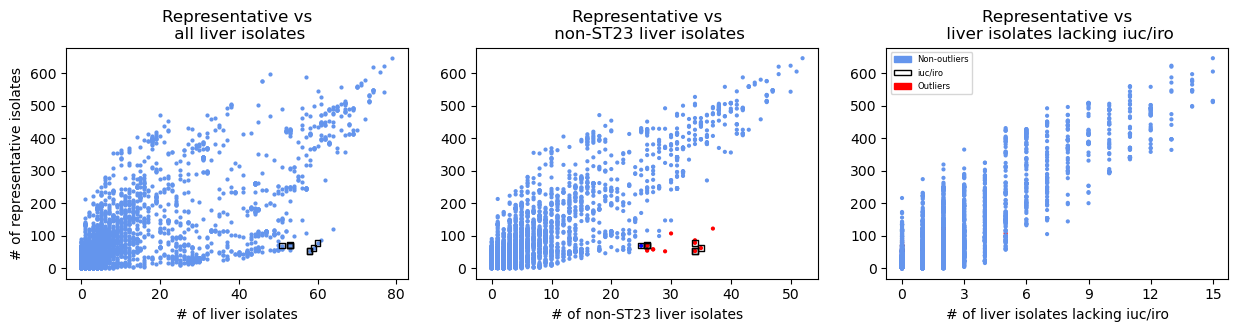

GeneID	Description	Liver non-ST23	Liver ST23	Non-Liver
B58052	EamA family transporter	34	27	86
B239784	hypothetical protein	30	27	107
B362201	hypothetical protein	34	26	78
B538146	Transposase	26	27	57
B381588	MFS transporter	26	27	71
B381713	aerobactin synthetase subunit alpha	26	27	69
B381836	N(6)-hydroxylysine O-acetyltransferase	26	27	70
B382081	NADPH-dependent L-lysine N(6)-monooxygenase	26	27	71
B382206	ferric aerobactin receptor IutA	26	27	71
B597737	GTP-binding protein	37	27	122
B384912	response regulator	26	19	54
B385021	response regulator transcription factor	29	20	52
B603951	TonB-dependent siderophore receptor	35	24	62
B385338	hypothetical protein	34	24	53
B385452	hypothetical protein	34	24	53
B385565	hypothetical protein	27	24	58
B385675	hypothetical protein	27	24	58


In [6]:
from sklearn.linear_model import LinearRegression

LiverExST23=np.where( (labels=="L") & (STs!="ST23") )[0]
LiverST23=np.where( (labels=="L") & ( (STs=="ST23") ) )[0]
LiverNoSiderophore=np.intersect1d(np.where( (labels=="L") )[0],np.where(np.sum(dataDF[siderophoreIDs],axis=1)==0)[0])

NonLiver=np.where( (labels!="L")  )[0]

genesCountLiverExST23=np.count_nonzero(matrix[LiverExST23,:],axis=0)
genesCountLiverST23=np.count_nonzero(matrix[LiverST23,:],axis=0)
genesCountNonLiver=np.count_nonzero(matrix[NonLiver,:],axis=0)
genesCountLiverNoSiderophore=np.count_nonzero(matrix[LiverNoSiderophore,:],axis=0)


# x_max=len(LiverExST23)
# y_max=len(NonLiver)
# distances=np.zeros(len(genesCountNonLiver))
# for i in range(0,len(genesCountNonLiver)):
#     x=genesCountLiverExST23[i]
#     y=genesCountNonLiver[i]
#     distances[i]=(y_max*x-x_max*y)/pow(pow(x_max,2)+pow(y_max,2),0.5)

regData=pd.DataFrame(data={"y":genesCountNonLiver, "x":genesCountLiverExST23})
regression = LinearRegression(fit_intercept=False).fit(regData["x"].values.reshape(-1,1), regData["y"])
predictions = regression.predict(regData["x"].values.reshape(-1,1))
residuals=regData["y"]-predictions

OultierDistance=np.percentile(residuals,99.9)
OutlierGeneIndices=np.where(residuals<-OultierDistance)[0]
OutlierGeneIDs=dataDF.columns[OutlierGeneIndices]
GeneColours={}
for id in dataDF.columns:
    if id in OutlierGeneIDs:
        GeneColours[id]="red"
    elif id in siderophoreIDs:
        GeneColours[id]="blue"
    else:
        GeneColours[id]="cornflowerblue"
fig, axs = plt.subplots(1,3)
fig.set_size_inches(15,3)
axs[0].scatter(genesCountLiverExST23+genesCountLiverST23,genesCountNonLiver, s=4, c="cornflowerblue")
axs[0].scatter(genesCountLiverExST23+genesCountLiverST23,genesCountNonLiver, s=15, marker="s", c="None", edgecolors=["None" if f not in siderophoreIDs else "black" for f in dataDF.columns])
axs[0].set_title("Representative vs\n all liver isolates")
axs[0].set_ylabel("# of representative isolates")
axs[0].set_xlabel("# of liver isolates")
axs[1].scatter(genesCountLiverExST23,genesCountNonLiver, s=4, c=[GeneColours[f] for f in dataDF.columns])
axs[1].scatter(genesCountLiverExST23,genesCountNonLiver, s=15, marker="s", c="None", edgecolors=["None" if f not in siderophoreIDs else "black" for f in dataDF.columns])
axs[1].set_title("Representative vs\n non-ST23 liver isolates")
axs[1].set_xlabel("# of non-ST23 liver isolates")
axs[2].scatter(genesCountLiverNoSiderophore,genesCountNonLiver, s=4, c=[GeneColours[f] for f in dataDF.columns])
axs[2].set_title("Representative vs\n liver isolates lacking iuc/iro")
axs[2].set_xlabel("# of liver isolates lacking iuc/iro")
axs[2].set_xticks(np.arange(0, 16, 3))

#Set legend
legendElements=[]
legendElements.append(mpatches.Circle(xy=(0,0),color="cornflowerblue", label="Non-outliers"))
legendElements.append(mpatches.Rectangle(xy=(0,0), height=4, width=4, fill=False, color="black", label="iuc/iro"))
legendElements.append(mpatches.Patch(color="red", facecolor="red", label="Outliers"))
plt.legend(handles=legendElements,prop={'size': 6}, loc="best")

plt.show()


print("GeneID\tDescription\tLiver non-ST23\tLiver ST23\tNon-Liver")
for gene in OutlierGeneIndices:
    print('\t'.join([dataDF.columns[gene],nodeDescription[dataDF.columns[gene]],str(genesCountLiverExST23[gene]),str(genesCountLiverST23[gene]),str(genesCountNonLiver[gene])]))

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(matrix[LiverExST23,:][:,OutlierGeneIndices])
plt.xticks(ticks=np.arange(len(OutlierGeneIndices)),labels=np.asarray(dataDF.columns)[OutlierGeneIndices],rotation=90)
plt.yticks(ticks=np.arange(len(LiverExST23)),labels=np.asarray(dataDF.index)[LiverExST23])
plt.colorbar()
plt.show()


/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)
/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


140


/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)
/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


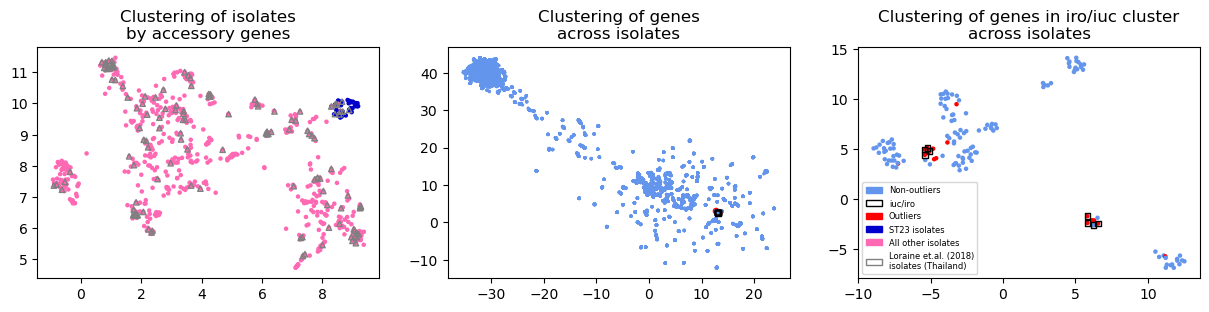

In [20]:
#run dimensional reduction on liver samples and genes which occur more than ones
#highlight outlier genes in the resulting figure

NonSingletonGenes=dataDF.columns[np.where(  np.sum(matrix,axis=0) > 1)[0]] #gene needs to be present in more than one samples
nonST23=np.where( STs!="ST23")[0]

#####There will be three figures: Samples X Genes, Genes X Samples and Genes (Oultier only) X Samples
SamplesVsGenes = umap.UMAP(n_neighbors=25, min_dist=0.1, metric="jaccard").fit_transform(dataDF[NonSingletonGenes])
GenesVsSamples = umap.UMAP(n_neighbors=50, min_dist=0.1, metric="hamming").fit_transform(np.transpose(dataDF[NonSingletonGenes].to_numpy()))

GenesVsSamplesClusters = DBSCAN(eps=0.5, min_samples=5).fit(GenesVsSamples).labels_
outlierClusters=set()
for i in range(0,len(GenesVsSamplesClusters)):
    if NonSingletonGenes[i] in OutlierGeneIDs:
        outlierClusters.add(GenesVsSamplesClusters[i])
clusterCounts=Counter(GenesVsSamplesClusters)

clusterIndices=np.array([], dtype=np.int32)
for cluster in outlierClusters:
    print(clusterCounts[cluster])
    clusterIndices=np.hstack( (clusterIndices,np.where(np.asarray(GenesVsSamplesClusters)==cluster)[0]) )

OutlierClustersUmap = umap.UMAP(n_neighbors=15, min_dist=0.5, metric="hamming").fit_transform(np.transpose(dataDF[NonSingletonGenes].to_numpy()[:,clusterIndices]))

fig, axs = plt.subplots(1,3)
fig.set_size_inches(15,3)


axs[0].scatter(SamplesVsGenes[:,0],SamplesVsGenes[:,1], s=5, c=["mediumblue" if i=="ST23" else "hotpink" for i in STs])
axs[0].scatter(SamplesVsGenes[:,0],SamplesVsGenes[:,1], s=15, marker="^", c="None", edgecolors=["grey" if i=="S" or i=="R" else "None" for i in labels])
axs[0].set_title("Clustering of isolates\nby accessory genes")

axs[1].scatter(GenesVsSamples[:,0],GenesVsSamples[:,1], s=[15 if i in OutlierGeneIDs else 2 for i in NonSingletonGenes], 
                c=["red" if i in OutlierGeneIDs else "cornflowerblue" for i in NonSingletonGenes])
axs[1].scatter(GenesVsSamples[:,0],GenesVsSamples[:,1], s=15, marker="s", c="None", edgecolors=["None" if f not in siderophoreIDs else "black" for f in NonSingletonGenes])
axs[1].set_title("Clustering of genes\nacross isolates")

axs[2].scatter(OutlierClustersUmap[:,0],OutlierClustersUmap[:,1], s=5, c=["red" if dataDF.columns[f] in OutlierGeneIDs else "cornflowerblue" for f in clusterIndices])
axs[2].scatter(OutlierClustersUmap[:,0],OutlierClustersUmap[:,1], s=15, marker="s", c="None", edgecolors=["None" if dataDF.columns[f] not in siderophoreIDs else "black" for f in clusterIndices])
axs[2].set_title("Clustering of genes in iro/iuc cluster\nacross isolates")


#Set legend
legendElements=[]
legendElements.append(mpatches.Circle(xy=(0,0),color="cornflowerblue", label="Non-outliers"))
legendElements.append(mpatches.Rectangle(xy=(0,0), height=4, width=4, fill=False, color="black", label="iuc/iro"))
legendElements.append(mpatches.Circle(xy=(0,0),color="red", label="Outliers"))
legendElements.append(mpatches.Patch(color="mediumblue", facecolor="mediumblue", label="ST23 isolates"))
legendElements.append(mpatches.Patch(color="hotpink", label="All other isolates"))
legendElements.append(mpatches.Polygon(xy=np.random.rand(3 ,2),  fill=False, color="grey", label="Loraine et.al. (2018)\nisolates (Thailand)"))
plt.legend(handles=legendElements,prop={'size': 6}, loc="best")
plt.show()

OutlierGeneClusters = DBSCAN(eps=1, min_samples=5).fit(OutlierClustersUmap).labels_
with open(wd+"Table1Umap.tsv", "w") as output:
    output.write("ID\tCluster\tX1\tX2\tDescription\ttCountNonLiver\CountLiver\n")
    for i in range(0,len(clusterIndices)):
        geneID=dataDF.columns[clusterIndices[i]]
        output.write('\t'.join([str(f) for f in [geneID, OutlierGeneClusters[i], OutlierClustersUmap[i,0], OutlierClustersUmap[i,1],
            nodeDescription[geneID], genesCountNonLiver[clusterIndices[i]], genesCountLiverExST23[clusterIndices[i]]+genesCountLiverST23[clusterIndices[i]]   ]]  )+"\n")

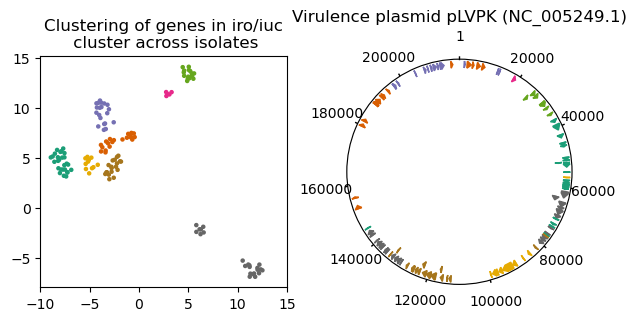

In [29]:
##Run temp.sh to get the list of FASTA sequences for each gene node. This isn't ideal because genes a lot within node
##Build a plasmid circle plot with list of best blast hit per fasta gene sequence
import biotite.sequence as seq
import biotite.sequence.io.genbank as gb
import biotite.sequence.graphics as graphics
import biotite.database.entrez as entrez
import matplotlib.colors as clr

#####!!!! Here a bash script needs to be run
#CollectFig2CFastas.sh
#and blast fastas vs the plasmid


#Determine the clusters of genes in Figure 2C
features={} #key=B###, value=(start,stop,e-value)
###These are blast results
with open("/mnt/storage5/anton/Loraine_Liver_Data/NC_005249_vs_fig2C.tsv") as blastHits:
    for line in blastHits:
        values=line.strip().split("\t")
        id=values[0]
        start=min(int(values[4]),int(values[5]))
        stop=max(int(values[4]),int(values[5]))
        if id not in features:
            features[id]=(  start, stop  ,float(values[6]))
        elif features[id][2]>float(values[6]):
            features[id]=(start, stop,float(values[6]))
        else:
            pass


IDsToClusters={}
for i in range(0,len(clusterIndices)):
    geneID=dataDF.columns[clusterIndices[i]]
    IDsToClusters[geneID]=OutlierGeneClusters[i]

##Create dictionary of cluster IDs to cmap hex colour
ClustersToColour={}
NumberOfClusters=len(set(IDsToClusters.values()))
clustersCmap=plt.cm.get_cmap('Dark2', NumberOfClusters)
for i in set(IDsToClusters.values()):
    ClustersToColour[i]=clustersCmap( len(ClustersToColour) / NumberOfClusters )
    ClustersToColour[i]=clr.rgb2hex(ClustersToColour[i])


#allows to define custom colour for each feature
def custom_feature_formatter(feature):
    # AddGene stores the feature label in the '\label' qualifier
    label = feature.qual.get("label")
    if feature.key != "source":
        return True, ClustersToColour[feature.key], "black", label
    else:
        return True, "black", "black", label


PlasmidSize=219385
featuresList=[]

for feature in features:
    featuresList.append(    
        seq.Feature(
        IDsToClusters[feature],
        [seq.Location(features[feature][0], features[feature][1])],
        {"product": "gene"}
    ))


annotation = seq.Annotation(featuresList)


fig = plt.figure()
#fig, axs = plt.subplots(1,3)
fig.set_size_inches(7,3)

ax_scatter=fig.add_subplot(121)
ax_scatter.scatter(OutlierClustersUmap[:,0],OutlierClustersUmap[:,1], s=5, c=[ClustersToColour[f] for f in OutlierGeneClusters] )
ax_scatter.set_title("Clustering of genes in iro/iuc\n cluster across isolates")
ax_scatter.set_xticks(np.arange(-10, 16, 5))
#ax_scatter.set_yticks(np.arange(0, 16, 3))

ax_polar = fig.add_subplot(122, projection="polar")
graphics.plot_plasmid_map(
    ax_polar, annotation, plasmid_size=PlasmidSize, label="", tick_step=20000,
    label_properties={"fontsize": 2}, feature_formatter=custom_feature_formatter
)
ax_polar.set_title("Virulence plasmid pLVPK (NC_005249.1)")
#ticks = ax_polar.get_xticks()
#labels = ax_polar.get_xticklabels()

#fig.tight_layout()
plt.show()



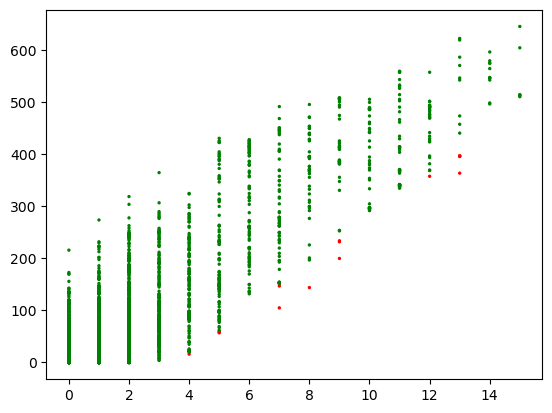

B21753	Transcriptional regulator%2C AraC family protein	12	358
B597693	Hypothetical protein	7	105
B183463	membrane protein	13	396
B184381	PTS mannose/fructose/sorbose/N-acetylgalactosamine transporter subunit IIC	13	397
B184840	PTS mannose/fructose/sorbose transporter subunit IIB	13	397
B185300	PTS mannose transporter subunit IIAB	13	397
B196248	hypothetical protein	9	234
B197150	putative protein	9	232
B199447	histidine phosphatase family protein	13	364
B204238	family 2 glycosyl transferase	9	200
B380492	putative protein	5	60
B512927	hypothetical protein	8	144
B595910	Repressor protein CI	5	57
B603131	restriction endonuclease subunit R	5	58
B473607	LysR family transcriptional regulator	7	147
B522595	hypothetical protein	4	16


In [11]:
###Examine the samples that lack iro/iuc loci

LiverNoSiderophore=np.intersect1d(np.where( (labels=="L") )[0],np.where(np.sum(dataDF[siderophoreIDs],axis=1)==0)[0])
NonLiver=np.where( (labels!="L")  )[0]
genesCountLiverNoSiderophore=np.count_nonzero(matrix[LiverNoSiderophore,:],axis=0)
genesCountNonLiver=np.count_nonzero(matrix[NonLiver,:],axis=0)

x_max=len(LiverNoSiderophore)
y_max=len(NonLiver)
distances=np.zeros(len(genesCountNonLiver))
for i in range(0,len(genesCountNonLiver)):
    x=genesCountLiverNoSiderophore[i]
    y=genesCountNonLiver[i]
    distances[i]=(y_max*x-x_max*y)/pow(pow(x_max,2)+pow(y_max,2),0.5)
temp=np.percentile(distances,99.9)

plt.scatter(genesCountLiverNoSiderophore,genesCountNonLiver, s=2, c=["red" if f>temp else "cornflowerblue" for f in distances])
plt.show()
print("ID\tDescription\tLiver\tNon-Liver")
for index in np.where(distances>temp)[0]:
    print(dataDF.columns[index]+"\t"+nodeDescription[dataDF.columns[index]]+"\t"+str(genesCountLiverNoSiderophore[index])+"\t"+str(genesCountNonLiver[index]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes"
]

#Classifiers that consistently give poor results are exluded. Mutliple parameter options were examined
classifiers = [
    KNeighborsClassifier(3, metric="hamming"),
    SVC(kernel="linear", C=0.025, class_weight='balanced'),
    SVC(gamma=2, C=1, class_weight='balanced'),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()
]

classifierScores={}
for name in names:
    if name not in classifierScores:
        classifierScores[name]=[]


for i in range(0,200):
    print(i)
    NonLiverSubSampleSize=len(LiverNoSiderophore)
    NonLiverSubSample=random.sample(list(NonLiver),NonLiverSubSampleSize)
    nonSiderophoreY=["hvKp"]*len(LiverNoSiderophore)+["cKp"]*len(NonLiverSubSample)
    nonSiderophoreX=np.vstack( (dataDF.to_numpy()[LiverNoSiderophore,:],dataDF.to_numpy()[NonLiverSubSample,:]) )
    zeroCountGenes=np.where(np.sum(dataDF.to_numpy()[LiverNoSiderophore,:],axis=0)>0)[0]
    nonSiderophoreX=nonSiderophoreX[:,zeroCountGenes]

    x=nonSiderophoreX
    y=nonSiderophoreY

    # iterate over classifiers
    #Change the size of test/training datasets here. The dataset size is so small, that no inference can be obtained.
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.5, random_state=42
    )

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        clf.predict
        score = clf.score(X_test, y_test)
        classifierScores[name].append(score)
        #print(name)
        #print(score)
        #print(confusion_matrix(y_test, clf.predict(X_test)))
        #break




/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  if __name__ == '__main__':


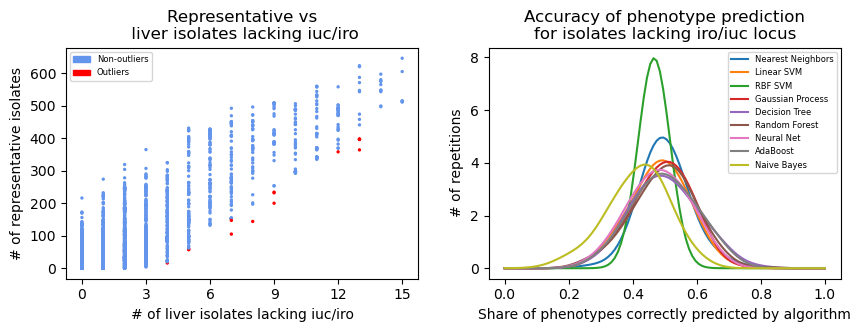

In [39]:
from sklearn.neighbors import KernelDensity

fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,3)

axs[0].scatter(genesCountLiverNoSiderophore,genesCountNonLiver, s=2, c=["red" if f>temp else "cornflowerblue" for f in distances])
legendElements=[]
legendElements.append(mpatches.Circle(xy=(0,0),color="cornflowerblue", label="Non-outliers"))
legendElements.append(mpatches.Patch(color="red", facecolor="red", label="Outliers"))
axs[0].legend(handles=legendElements,prop={'size': 6}, loc="best")
axs[0].set_title("Representative vs\n liver isolates lacking iuc/iro")
axs[0].set_xlabel("# of liver isolates lacking iuc/iro")
axs[0].set_ylabel("# of representative isolates")
axs[0].set_xticks(np.arange(0, 16, 3))


for name in classifierScores:
    kde = KernelDensity(kernel="gaussian", bandwidth=0.05).fit(np.asarray(classifierScores[name]).reshape(-1, 1))
    log_dens=kde.score_samples(np.linspace(0, 1, 100).reshape(-1, 1))
    axs[1].plot(np.linspace(0, 1, 100), np.exp(log_dens), label=name)
axs[1].legend(prop={'size': 6})
axs[1].set_title("Accuracy of phenotype prediction\nfor isolates lacking iro/iuc locus")
axs[1].set_ylabel("# of repetitions")
axs[1].set_xlabel("Share of phenotypes correctly predicted by algorithm")
plt.show()

In [ ]:
####This is a test of model when random data is added. Genearally UMAP and TSNE are better at separating injected data than PCA

probabilityPresent=np.sum(matrix)/(matrix.shape[0]*matrix.shape[1])
probabilityPresent=0.1
spikedMatrix=matrix[:,NonSingletonGenes]
SpikedSTs=list(STs)
for i in range(0,50):
    spikVector=np.random.choice([0,1], size=spikedMatrix.shape[1], p=[1-probabilityPresent,probabilityPresent])
    spikedMatrix=np.vstack( (spikedMatrix,spikVector) )
    SpikedSTs.append("Fake")


coloursDic={"ST23":"red", "Fake":"orange", "ST258": "blue", "ST11": "black"}
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(15,5)

pcaResults=PCA(n_components=15).fit_transform(spikedMatrix)
axs[1].scatter(pcaResults[:,2],pcaResults[:,1], s=2, c=[coloursDic[i] if i in coloursDic else "green" for i in SpikedSTs])
axs[1].set_title("PCA")


SamplesVsGenesSkiped = umap.UMAP(n_neighbors=50, min_dist=0.1, metric="euclidean").fit_transform(pcaResults)
clustering = DBSCAN(eps=1.5, min_samples=5).fit(SamplesVsGenesSkiped).labels_
axs[0].scatter(SamplesVsGenesSkiped[:,0],SamplesVsGenesSkiped[:,1], s=2, c=[coloursDic[i] if i in coloursDic else "green" for i in SpikedSTs])
axs[0].set_title("UMAP")

tSNEresults=TSNE(n_components=2, perplexity=75, metric="euclidean",square_distances=True).fit_transform(pcaResults)
axs[2].scatter(tSNEresults[:,0],tSNEresults[:,1], s=2, c=[coloursDic[i] if i in coloursDic else "green" for i in SpikedSTs])
axs[2].set_title("T-SNE")
plt.show()


In [38]:
# Generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

# Decreasing coef w. alternated signs for visualization
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
y = np.dot(X, coef)

# Add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[: n_samples // 2], y[: n_samples // 2]
X_test, y_test = X[n_samples // 2 :], y[n_samples // 2 :]

from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)


Lasso(alpha=0.1)
r^2 on test data : 0.658064
